## TD2 TD3 TD4

In [10]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [4]:
os.chdir('./')
file_chdir = os.getcwd() #current folder
csv_list = []
for root, dirs, files in os.walk(file_chdir):
    for file in files:
        if os.path.splitext(file)[1] == '.csv':
            csv_list.append(file)
csv_list

['Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv',
 'Monday-WorkingHours.pcap_ISCX.csv',
 'Friday-WorkingHours-Morning.pcap_ISCX.csv',
 'Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv',
 'Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv',
 'Tuesday-WorkingHours.pcap_ISCX.csv',
 'Wednesday-workingHours.pcap_ISCX.csv',
 'Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv']

In [32]:
data = pd.read_csv(csv_list[-1], encoding='ISO-8859-1')
nrow = data.shape[0] #row number
ncol = data.shape[1] #column number
data.head()

/Users/pqros/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (0,1,3,6,20,21,84) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,192.168.10.3-192.168.10.50-389-33898-6,192.168.10.50,33898.0,192.168.10.3,389.0,6.0,6/7/2017 8:59,113095465.0,48.0,24.0,...,32.0,203985.500,5.758373e+05,1629110.0,379.0,13800000.0,4.277541e+06,16500000.0,6737603.0,BENIGN
1,192.168.10.3-192.168.10.50-389-33904-6,192.168.10.50,33904.0,192.168.10.3,389.0,6.0,6/7/2017 8:59,113473706.0,68.0,40.0,...,32.0,178326.875,5.034269e+05,1424245.0,325.0,13800000.0,4.229413e+06,16500000.0,6945512.0,BENIGN
2,8.0.6.4-8.6.0.1-0-0-0,8.6.0.1,0.0,8.0.6.4,0.0,0.0,6/7/2017 8:59,119945515.0,150.0,0.0,...,0.0,6909777.333,1.170000e+07,20400000.0,6.0,24400000.0,2.430000e+07,60100000.0,5702188.0,BENIGN
3,192.168.10.14-65.55.44.109-59135-443-6,192.168.10.14,59135.0,65.55.44.109,443.0,6.0,6/7/2017 8:59,60261928.0,9.0,7.0,...,20.0,0.000,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,BENIGN
4,192.168.10.3-192.168.10.14-53-59555-17,192.168.10.14,59555.0,192.168.10.3,53.0,17.0,6/7/2017 8:59,269.0,2.0,2.0,...,32.0,0.000,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,BENIGN


In [33]:
#Pour tester, on n'importe qu'une table au début
colnamelist = []
for colname in data.columns:
    if colname[0] == ' ':
        colnamelist.append(colname[1:])
    else:
        colnamelist.append(colname)
data.columns = colnamelist
data.head()

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,192.168.10.3-192.168.10.50-389-33898-6,192.168.10.50,33898.0,192.168.10.3,389.0,6.0,6/7/2017 8:59,113095465.0,48.0,24.0,...,32.0,203985.500,5.758373e+05,1629110.0,379.0,13800000.0,4.277541e+06,16500000.0,6737603.0,BENIGN
1,192.168.10.3-192.168.10.50-389-33904-6,192.168.10.50,33904.0,192.168.10.3,389.0,6.0,6/7/2017 8:59,113473706.0,68.0,40.0,...,32.0,178326.875,5.034269e+05,1424245.0,325.0,13800000.0,4.229413e+06,16500000.0,6945512.0,BENIGN
2,8.0.6.4-8.6.0.1-0-0-0,8.6.0.1,0.0,8.0.6.4,0.0,0.0,6/7/2017 8:59,119945515.0,150.0,0.0,...,0.0,6909777.333,1.170000e+07,20400000.0,6.0,24400000.0,2.430000e+07,60100000.0,5702188.0,BENIGN
3,192.168.10.14-65.55.44.109-59135-443-6,192.168.10.14,59135.0,65.55.44.109,443.0,6.0,6/7/2017 8:59,60261928.0,9.0,7.0,...,20.0,0.000,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,BENIGN
4,192.168.10.3-192.168.10.14-53-59555-17,192.168.10.14,59555.0,192.168.10.3,53.0,17.0,6/7/2017 8:59,269.0,2.0,2.0,...,32.0,0.000,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,BENIGN


In [35]:
#Delete non numeric columns
labelColumn = data['Label']
data = data._get_numeric_data()
data['Label'] = labelColumn
data.head()

,Source Port,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,33898.0,389.0,6.0,113095465.0,48.0,24.0,9668.0,10012.0,403.0,0.0,...,32.0,203985.500,5.758373e+05,1629110.0,379.0,13800000.0,4.277541e+06,16500000.0,6737603.0,BENIGN
1,33904.0,389.0,6.0,113473706.0,68.0,40.0,11364.0,12718.0,403.0,0.0,...,32.0,178326.875,5.034269e+05,1424245.0,325.0,13800000.0,4.229413e+06,16500000.0,6945512.0,BENIGN
2,0.0,0.0,0.0,119945515.0,150.0,0.0,0.0,0.0,0.0,0.0,...,0.0,6909777.333,1.170000e+07,20400000.0,6.0,24400000.0,2.430000e+07,60100000.0,5702188.0,BENIGN
3,59135.0,443.0,6.0,60261928.0,9.0,7.0,2330.0,4221.0,1093.0,0.0,...,20.0,0.000,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,BENIGN
4,59555.0,53.0,17.0,269.0,2.0,2.0,102.0,322.0,51.0,51.0,...,32.0,0.000,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,BENIGN


In [36]:
# Supprimer toutes les lignes contenant au moins une valeur Inf ou NaN. 
data.replace(np.inf, np.nan, inplace=True)
data.replace(-np.inf, np.nan, inplace=True)
data = data.dropna(axis = 0, how = 'any')
data.shape[0]

170366

In [41]:
#Training data (X)
X = data.drop(['Label'], axis=1).as_matrix().astype(np.float)
np.isnan(X).any(), np.isinf(X).any()

(False, False)

In [42]:
#attack types (y)
attackTypes = data['Label'].unique()
attackTypes

array(['BENIGN', 'Web Attack \x96 Brute Force', 'Web Attack \x96 XSS',
       'Web Attack \x96 Sql Injection'], dtype=object)

In [45]:
y = data['Label']

In [46]:
#Method 1: We consider all 4 different attacks

In [47]:
#Construct cross validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X_train.shape, X_test.shape

((119256, 78), (51110, 78))

In [48]:
from sklearn.metrics import confusion_matrix

In [50]:
#Logistic Regression
logisticRegressionClassifier = LogisticRegression().fit(X_train, y_train)
y_trainPredict = logisticRegressionClassifier.predict(X_train)
y_testPredict = logisticRegressionClassifier.predict(X_test)

array([[50380,    66,     1,     5],
       [  161,   316,     0,     1],
       [    4,     0,     0,     0],
       [  106,    68,     0,     2]])

In [51]:
confusion_matrix(y_train, y_trainPredict), confusion_matrix(y_test, y_testPredict)

(array([[117529,    193,      2,     10],
        [   360,    669,      0,      0],
        [    17,      0,      0,      0],
        [   315,    152,      0,      9]]),
 array([[50380,    66,     1,     5],
        [  161,   316,     0,     1],
        [    4,     0,     0,     0],
        [  106,    68,     0,     2]]))

In [52]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
decisionTreeClassifier = DecisionTreeClassifier().fit(X_train, y_train)
y_trainPredict_dt = decisionTreeClassifier.predict(X_train)
y_testPredict_dt = decisionTreeClassifier.predict(X_test)

In [53]:
confusion_matrix(y_train, y_trainPredict_dt), confusion_matrix(y_test, y_testPredict_dt)

(array([[117734,      0,      0,      0],
        [     0,   1029,      0,      0],
        [     0,      0,     17,      0],
        [     0,      0,      0,    476]]),
 array([[50439,     8,     2,     3],
        [    4,   420,     0,    54],
        [    3,     0,     0,     1],
        [    0,    53,     0,   123]]))

In [54]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
randomForestClassifier = RandomForestClassifier().fit(X_train, y_train)
y_trainPredict_rf = randomForestClassifier.predict(X_train)
y_testPredict_rf = randomForestClassifier.predict(X_test)

In [55]:
confusion_matrix(y_train, y_trainPredict_rf), confusion_matrix(y_test, y_testPredict_rf)

(array([[117734,      0,      0,      0],
        [     3,   1021,      0,      5],
        [     0,      0,     17,      0],
        [     2,     13,      0,    461]]),
 array([[50447,     2,     0,     3],
        [    6,   417,     0,    55],
        [    2,     0,     2,     0],
        [    2,    67,     0,   107]]))

In [56]:
#Support Vector Machine (very slow!!!)
from sklearn.svm import LinearSVC
svmClassier = LinearSVC().fit(X_train, y_train)
y_trainPredict_svm = svmClassier.predict(X_train)
y_testPredict_svm = svmClassier.predict(X_test)

In [57]:
confusion_matrix(y_train, y_trainPredict_svm), confusion_matrix(y_test, y_testPredict_svm)

(array([[115469,    152,     19,   2094],
        [   156,     55,      0,    818],
        [    15,      2,      0,      0],
        [    30,     11,      0,    435]]),
 array([[49518,    69,     8,   857],
        [   59,    26,     0,   393],
        [    4,     0,     0,     0],
        [    5,     2,     0,   169]]))

## TD3

### On essaie de travailler sur toutes les tables

In [5]:
df_list = []
for csv in csv_list:
    df = pd.read_csv(csv, encoding='ISO-8859-1')
    df_list.append(df)

/Users/pqros/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/pqros/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/pqros/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (0,1,3,6,20,21,84) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
len(df_list)
#On fait le test avec un csv et simule tout à la fin

#data = df_list[0]

data = pd.concat(df_list)

data.shape

(3119345, 85)

In [7]:
#Pour tester, on n'importe qu'une table au début
colnamelist = []
for colname in data.columns:
    if colname[0] == ' ':
        colnamelist.append(colname[1:])
    else:
        colnamelist.append(colname)
data.columns = colnamelist
data.head()

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,192.168.10.12-192.168.10.50-60148-22-6,192.168.10.12,60148.0,192.168.10.50,22.0,6.0,6/7/2017 1:00,166.0,1.0,1.0,...,32.0,0.000,0.000,0.0,0.0,0.0,0.000,0.0,0.0,BENIGN
1,192.168.10.12-192.168.10.50-60148-22-6,192.168.10.50,22.0,192.168.10.12,60148.0,6.0,6/7/2017 1:00,83.0,1.0,2.0,...,32.0,0.000,0.000,0.0,0.0,0.0,0.000,0.0,0.0,BENIGN
2,192.168.10.12-91.189.89.199-123-123-17,192.168.10.12,123.0,91.189.89.199,123.0,17.0,6/7/2017 1:00,99947.0,1.0,1.0,...,40.0,0.000,0.000,0.0,0.0,0.0,0.000,0.0,0.0,BENIGN
3,192.168.10.12-72.38.129.202-123-123-17,192.168.10.12,123.0,72.38.129.202,123.0,17.0,6/7/2017 1:00,37017.0,1.0,1.0,...,32.0,0.000,0.000,0.0,0.0,0.0,0.000,0.0,0.0,BENIGN
4,8.0.6.4-8.6.0.1-0-0-0,8.6.0.1,0.0,8.0.6.4,0.0,0.0,6/7/2017 1:00,111161336.0,147.0,0.0,...,0.0,1753752.625,2123197.578,4822992.0,95.0,9463032.7,2657727.996,13600000.0,5700287.0,BENIGN


In [8]:
#Delete non numeric columns
labelColumn = data['Label']
data = data._get_numeric_data()
data['Label'] = labelColumn
data.head()

,Source Port,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,60148.0,22.0,6.0,166.0,1.0,1.0,0.0,0.0,0.0,0.0,...,32.0,0.000,0.000,0.0,0.0,0.0,0.000,0.0,0.0,BENIGN
1,22.0,60148.0,6.0,83.0,1.0,2.0,0.0,0.0,0.0,0.0,...,32.0,0.000,0.000,0.0,0.0,0.0,0.000,0.0,0.0,BENIGN
2,123.0,123.0,17.0,99947.0,1.0,1.0,48.0,48.0,48.0,48.0,...,40.0,0.000,0.000,0.0,0.0,0.0,0.000,0.0,0.0,BENIGN
3,123.0,123.0,17.0,37017.0,1.0,1.0,48.0,48.0,48.0,48.0,...,32.0,0.000,0.000,0.0,0.0,0.0,0.000,0.0,0.0,BENIGN
4,0.0,0.0,0.0,111161336.0,147.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1753752.625,2123197.578,4822992.0,95.0,9463032.7,2657727.996,13600000.0,5700287.0,BENIGN


In [11]:
# Supprimer toutes les lignes contenant au moins une valeur Inf ou NaN. 
data.replace(np.inf, np.nan, inplace=True)
data.replace(-np.inf, np.nan, inplace=True)
data = data.dropna(axis = 0, how = 'any')
data.shape[0]

2830743

In [ ]:
#Training data (X)
X = data.drop(['Label'], axis=1).as_matrix().astype(np.float)
np.isnan(X).any(), np.isinf(X).any()

In [ ]:
#attack types (y)
attackTypes = data['Label'].unique()
attackTypes

In [96]:
len(attackTypes) #We have up to 15 kinds of attacks!!

15

In [97]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
decisionTreeClassifier = DecisionTreeClassifier().fit(X_train, y_train)
y_trainPredict_dt = decisionTreeClassifier.predict(X_train)
y_testPredict_dt = decisionTreeClassifier.predict(X_test)

In [98]:
confusion_matrix(y_train, y_trainPredict_dt), confusion_matrix(y_test, y_testPredict_dt)

(array([[117734,      0,      0,      0],
        [     0,   1029,      0,      0],
        [     0,      0,     17,      0],
        [     0,      0,      0,    476]]),
 array([[50440,     8,     2,     2],
        [    4,   420,     0,    54],
        [    3,     1,     0,     0],
        [    0,    52,     0,   124]]))

In [99]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
randomForestClassifier = RandomForestClassifier().fit(X_train, y_train)
y_trainPredict_rf = randomForestClassifier.predict(X_train)
y_testPredict_rf = randomForestClassifier.predict(X_test)

In [100]:
confusion_matrix(y_train, y_trainPredict_rf), confusion_matrix(y_test, y_testPredict_rf)

(array([[117734,      0,      0,      0],
        [     1,   1025,      0,      3],
        [     1,      0,     16,      0],
        [     4,      7,      0,    465]]),
 array([[50451,     1,     0,     0],
        [    5,   421,     0,    52],
        [    4,     0,     0,     0],
        [    1,    71,     0,   104]]))

In [101]:
#Support Vector Machine (very slow!!!)
from sklearn.svm import LinearSVC
svmClassier = LinearSVC().fit(X_train, y_train)
y_trainPredict_svm = svmClassier.predict(X_train)
y_testPredict_svm = svmClassier.predict(X_test)

In [102]:
confusion_matrix(y_train, y_trainPredict_svm), confusion_matrix(y_test, y_testPredict_svm)

(array([[117490,    182,     35,     27],
        [   155,    874,      0,      0],
        [    15,      2,      0,      0],
        [    30,    445,      1,      0]]),
 array([[50337,    82,    18,    15],
        [   58,   420,     0,     0],
        [    4,     0,     0,     0],
        [    5,   171,     0,     0]]))

### Accuracy, Precision, Recall
$$Accuracy = \dfrac{True}{True + False}$$
$$Precision = \dfrac{True\ positive}{True\ positive + False\ positive}$$
$$Recall = \dfrac{True\ positive}{True\ positive + False\ negative}$$

In [114]:
#2-classifier
y[y != 'BENIGN'] = 'MALIGN'
y.unique()

array(['BENIGN', 'MALIGN'], dtype=object)

In [115]:
# decision tree
accuracy_test = []
precision_test = []
recall_test = []
for i in range(9):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1 * i + 0.1)
    decisionTreeClassifier = DecisionTreeClassifier().fit(X_train, y_train)
    y_trainPredict = decisionTreeClassifier.predict(X_train)
    y_testPredict = decisionTreeClassifier.predict(X_test)
    accuracy_test.append(accuracy_score(y_test, y_testPredict))
    precision_test.append(precision_test(y_test, y_testPredict))
    recall_test.append(recall_test(y_test, y_testPredict))
    
accuracy_test
    
    


KeyboardInterrupt: 

# TD4

1 Sauvegardez les données chargées et nettoyées dans un pickle (fonctionnalité de base en Python).

In [1]:
import pickle as pk
import os
import numpy as npa
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [12]:
with open(r'./alldata.txt', 'wb') as f: #must be in binary mode!
    pk.dump(data, f)

In [13]:
#---------------------
data = pd.read_pickle('./alldata.txt')

In [14]:
X = data.drop(['Label'], axis=1)
y = data['Label']
y.unique()

array(['BENIGN', 'Infiltration', 'Bot', 'PortScan', 'DDoS', 'FTP-Patator',
       'SSH-Patator', 'DoS slowloris', 'DoS Slowhttptest', 'DoS Hulk',
       'DoS GoldenEye', 'Heartbleed', 'Web Attack \x96 Brute Force',
       'Web Attack \x96 XSS', 'Web Attack \x96 Sql Injection'],
      dtype=object)

In [18]:
y[y != 'BENIGN'] = 'MALIGN'

/Users/pqros/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [ ]:
#Save and load sklearn models in pickle

In [19]:
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [20]:
rfModel0 = RandomForestClassifier()
model0 = rfModel0.fit(X_train, y_train)

In [21]:
filename = 'rfModel0.sav'
pk.dump(model0, open(filename, 'wb'))

In [22]:
model0_test = pk.load(open(filename, 'rb'))
model0_test.score(X_test, y_test)

0.9995254485570928

#RandomForestClassifier(n_estimators=’warn’, criterion=’gini’, 
#max_depth=None, min_samples_split=2, min_samples_leaf=1, 
#min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, 
#min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, 
#oob_score=False, n_jobs=None, random_state=None, verbose=0, 
#ghtgwarm_start=False, class_weight=None)[source]¶

class_weight : Weights associated with classes in the form {class_label: weight}. If not given, all classes are supposed to have weight one. For multi-output problems, a list of dicts can be provided in the same order as the columns of y.

This is not the case in our example. As we see, the most of the data are of label BELIGN, which is extremely unbalanced.

In [23]:
rfModel_balanced = RandomForestClassifier(class_weight='balanced')
rfModel_balanced_subsample = RandomForestClassifier(class_weight='balanced_subsample')

In [27]:
model_balanced = rfModel_balanced.fit(X_train, y_train)
model_balanced_subsample = rfModel_balanced_subsample.fit(X_train, y_train)

In [28]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, model0_test.predict(X_test))

array([[682065,    146],
       [   257, 166755]])

In [31]:
confusion_matrix(y_test, model_balanced.predict(X_test))

array([[682058,    153],
       [   266, 166746]])

In [32]:
confusion_matrix(y_test, model_balanced_subsample.predict(X_test))

array([[682053,    158],
       [   308, 166704]])

## Partie Tensorflow

In [33]:
from __future__ import division, print_function, absolute_import
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [34]:
# Import MNIST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from t

In [35]:
# Training Parameters
learning_rate = 0.01
num_steps = 30000
batch_size = 256
display_step = 1000
examples_to_show = 10

In [36]:
# Network Parameters
num_hidden_1 = 256 # 1st layer num features
num_hidden_2 = 128 # 2nd layer num features (the latent dim)
num_input = 784 # MNIST data input (img shape: 28*28)

In [37]:
# tf Graph input (only pictures)
X = tf.placeholder("float", [None, num_input])

weights = {
    'encoder_h1': tf.Variable(tf.random_normal([num_input, num_hidden_1])),
    'encoder_h2': tf.Variable(tf.random_normal([num_hidden_1, num_hidden_2])),
    'decoder_h1': tf.Variable(tf.random_normal([num_hidden_2, num_hidden_1])),
    'decoder_h2': tf.Variable(tf.random_normal([num_hidden_1, num_input])),
} #initialize with normal variables

biases = {
    'encoder_b1': tf.Variable(tf.random_normal([num_hidden_1])),
    'encoder_b2': tf.Variable(tf.random_normal([num_hidden_2])),
    'decoder_b1': tf.Variable(tf.random_normal([num_hidden_1])),
    'decoder_b2': tf.Variable(tf.random_normal([num_input])),
}

In [38]:
# Building the encoder
def encoder(x):
    # Encoder Hidden layer with sigmoid activation #1 Wx+b
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['encoder_h1']),
                                   biases['encoder_b1']))
    # Encoder Hidden layer with sigmoid activation #2
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['encoder_h2']),
                                   biases['encoder_b2']))
    return layer_2

In [39]:
# Building the decoder
def decoder(x):
    # Decoder Hidden layer with sigmoid activation #1
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['decoder_h1']),
                                   biases['decoder_b1']))
    # Decoder Hidden layer with sigmoid activation #2
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['decoder_h2']),
                                   biases['decoder_b2']))
    return layer_2

In [40]:
# Construct model
encoder_op = encoder(X)
decoder_op = decoder(encoder_op)

In [41]:
# Prediction
y_pred = decoder_op
# Targets (Labels) are the input data.
y_true = X

In [42]:
# Define loss and optimizer, minimize the squared error
loss = tf.reduce_mean(tf.pow(y_true - y_pred, 2))
optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(loss)

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()


Step 1: Minibatch Loss: 0.456222
Step 1000: Minibatch Loss: 0.130505
Step 2000: Minibatch Loss: 0.112684
Step 3000: Minibatch Loss: 0.096528
Step 4000: Minibatch Loss: 0.093613
Step 5000: Minibatch Loss: 0.091934
Step 6000: Minibatch Loss: 0.088409
Step 7000: Minibatch Loss: 0.084668
Step 8000: Minibatch Loss: 0.083706
Step 9000: Minibatch Loss: 0.083159
Step 10000: Minibatch Loss: 0.080589
Step 11000: Minibatch Loss: 0.080406
Step 12000: Minibatch Loss: 0.078876
Step 13000: Minibatch Loss: 0.076246
Step 14000: Minibatch Loss: 0.073929
Step 15000: Minibatch Loss: 0.071227
Step 16000: Minibatch Loss: 0.072267
Step 17000: Minibatch Loss: 0.069713
Step 18000: Minibatch Loss: 0.068946
Step 19000: Minibatch Loss: 0.065310
Step 20000: Minibatch Loss: 0.062163
Step 21000: Minibatch Loss: 0.062392
Step 22000: Minibatch Loss: 0.057261
Step 23000: Minibatch Loss: 0.057584
Step 24000: Minibatch Loss: 0.056781
Step 25000: Minibatch Loss: 0.056823
Step 26000: Minibatch Loss: 0.056382
Step 27000: Mi

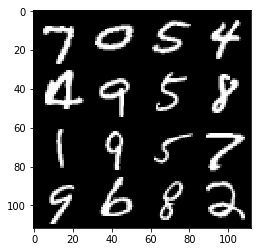

Reconstructed Images


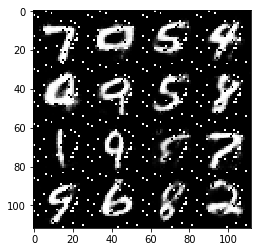

In [43]:
# Start Training
# Start a new TF session
with tf.Session() as sess:

    # Run the initializer
    sess.run(init)

    # Training
    for i in range(1, num_steps+1):
        # Prepare Data
        # Get the next batch of MNIST data (only images are needed, not labels)
        batch_x, _ = mnist.train.next_batch(batch_size)

        # Run optimization op (backprop) and cost op (to get loss value)
        _, l = sess.run([optimizer, loss], feed_dict={X: batch_x})
        # Display logs per step
        if i % display_step == 0 or i == 1:
            print('Step %i: Minibatch Loss: %f' % (i, l))

    # Testing
    # Encode and decode images from test set and visualize their reconstruction.
    n = 4
    canvas_orig = np.empty((28 * n, 28 * n))
    canvas_recon = np.empty((28 * n, 28 * n))
    for i in range(n):
        # MNIST test set
        batch_x, _ = mnist.test.next_batch(n)
        # Encode and decode the digit image
        g = sess.run(decoder_op, feed_dict={X: batch_x})

        # Display original images
        for j in range(n):
            # Draw the original digits
            canvas_orig[i * 28:(i + 1) * 28, j * 28:(j + 1) * 28] = \
                batch_x[j].reshape([28, 28])
        # Display reconstructed images
        for j in range(n):
            # Draw the reconstructed digits
            canvas_recon[i * 28:(i + 1) * 28, j * 28:(j + 1) * 28] = \
                g[j].reshape([28, 28])

    print("Original Images")
    plt.figure(figsize=(n, n))
    plt.imshow(canvas_orig, origin="upper", cmap="gray")
    plt.show()

    print("Reconstructed Images")
    plt.figure(figsize=(n, n))
    plt.imshow(canvas_recon, origin="upper", cmap="gray")
    plt.show()

Step 1: Minibatch Loss: 0.453761
Step 1000: Minibatch Loss: 0.153509
Step 2000: Minibatch Loss: 0.134463
Step 3000: Minibatch Loss: 0.116170
Step 4000: Minibatch Loss: 0.112446
Step 5000: Minibatch Loss: 0.111288
Step 6000: Minibatch Loss: 0.106027
Step 7000: Minibatch Loss: 0.102923
Step 8000: Minibatch Loss: 0.097654
Step 9000: Minibatch Loss: 0.094053
Step 10000: Minibatch Loss: 0.093544
Step 11000: Minibatch Loss: 0.090734
Step 12000: Minibatch Loss: 0.090934
Step 13000: Minibatch Loss: 0.087987
Step 14000: Minibatch Loss: 0.082880
Step 15000: Minibatch Loss: 0.083342
Step 16000: Minibatch Loss: 0.083005
Step 17000: Minibatch Loss: 0.083709
Step 18000: Minibatch Loss: 0.081252
Step 19000: Minibatch Loss: 0.078164
Step 20000: Minibatch Loss: 0.076561
Step 21000: Minibatch Loss: 0.074254
Step 22000: Minibatch Loss: 0.073300
Step 23000: Minibatch Loss: 0.070548
Step 24000: Minibatch Loss: 0.070712
Step 25000: Minibatch Loss: 0.066636
Step 26000: Minibatch Loss: 0.069425
Step 27000: Mi

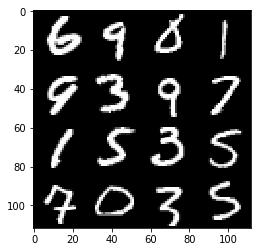

Reconstructed Images


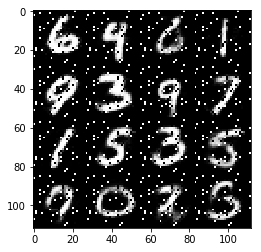

In [45]:
## 3 layers

# Training Parameters
learning_rate = 0.01
num_steps = 30000
batch_size = 256

display_step = 1000
examples_to_show = 10

# Network Parameters
num_hidden_1 = 256 # 1st layer num features
num_hidden_2 = 128 # 2nd layer num features (the latent dim)
num_hidden_3 = 128
num_input = 784 # MNIST data input (img shape: 28*28)

# tf Graph input (only pictures)
X = tf.placeholder("float", [None, num_input])

weights = {
    'encoder_h1': tf.Variable(tf.random_normal([num_input, num_hidden_1])),
    'encoder_h2': tf.Variable(tf.random_normal([num_hidden_1, num_hidden_2])),
    'encoder_h3': tf.Variable(tf.random_normal([num_hidden_2, num_hidden_3])),
    'decoder_h1': tf.Variable(tf.random_normal([num_hidden_3, num_hidden_2])),
    'decoder_h2': tf.Variable(tf.random_normal([num_hidden_2, num_hidden_1])),
    'decoder_h3': tf.Variable(tf.random_normal([num_hidden_1, num_input])),
}
biases = {
    'encoder_b1': tf.Variable(tf.random_normal([num_hidden_1])),
    'encoder_b2': tf.Variable(tf.random_normal([num_hidden_2])),
    'encoder_b3': tf.Variable(tf.random_normal([num_hidden_3])),
    'decoder_b1': tf.Variable(tf.random_normal([num_hidden_2])),
    'decoder_b2': tf.Variable(tf.random_normal([num_hidden_1])),
    'decoder_b3': tf.Variable(tf.random_normal([num_input])),
}

# Building the encoder
def encoder(x):
    # Encoder Hidden layer with sigmoid activation #1
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['encoder_h1']),
                                   biases['encoder_b1']))
    # Encoder Hidden layer with sigmoid activation #2
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['encoder_h2']),
                                   biases['encoder_b2']))
    
    layer_3 = tf.nn.sigmoid(tf.add(tf.matmul(layer_2, weights['encoder_h3']),
                            biases['encoder_b3']))
    
    return layer_3


# Building the decoder
def decoder(x):
    # Decoder Hidden layer with sigmoid activation #1
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['decoder_h1']),
                                   biases['decoder_b1']))
    # Decoder Hidden layer with sigmoid activation #2
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['decoder_h2']),
                                   biases['decoder_b2']))
    
    layer_3 = tf.nn.sigmoid(tf.add(tf.matmul(layer_2, weights['decoder_h3']),
                                   biases['decoder_b3']))
    
    return layer_3

# Construct model
encoder_op = encoder(X)
decoder_op = decoder(encoder_op)

# Prediction
y_pred = decoder_op
# Targets (Labels) are the input data.
y_true = X

# Define loss and optimizer, minimize the squared error
loss = tf.reduce_mean(tf.pow(y_true - y_pred, 2))
optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(loss)

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

# Start Training
# Start a new TF session
with tf.Session() as sess:

    # Run the initializer
    sess.run(init)

    # Training
    for i in range(1, num_steps+1):
        # Prepare Data
        # Get the next batch of MNIST data (only images are needed, not labels)
        batch_x, _ = mnist.train.next_batch(batch_size)

        # Run optimization op (backprop) and cost op (to get loss value)
        _, l = sess.run([optimizer, loss], feed_dict={X: batch_x})
        # Display logs per step
        if i % display_step == 0 or i == 1:
            print('Step %i: Minibatch Loss: %f' % (i, l))

    # Testing
    # Encode and decode images from test set and visualize their reconstruction.
    n = 4
    canvas_orig = np.empty((28 * n, 28 * n))
    canvas_recon = np.empty((28 * n, 28 * n))
    for i in range(n):
        # MNIST test set
        batch_x, _ = mnist.test.next_batch(n)
        # Encode and decode the digit image
        g = sess.run(decoder_op, feed_dict={X: batch_x})

        # Display original images
        for j in range(n):
            # Draw the original digits
            canvas_orig[i * 28:(i + 1) * 28, j * 28:(j + 1) * 28] = \
                batch_x[j].reshape([28, 28])
        # Display reconstructed images
        for j in range(n):
            # Draw the reconstructed digits
            canvas_recon[i * 28:(i + 1) * 28, j * 28:(j + 1) * 28] = \
                g[j].reshape([28, 28])

    print("Original Images")
    plt.figure(figsize=(n, n))
    plt.imshow(canvas_orig, origin="upper", cmap="gray")
    plt.show()

    print("Reconstructed Images")
    plt.figure(figsize=(n, n))
    plt.imshow(canvas_recon, origin="upper", cmap="gray")
    plt.show()

Step 1: Minibatch Loss: 0.437083
Step 1000: Minibatch Loss: 0.062815
Step 2000: Minibatch Loss: 0.050702
Step 3000: Minibatch Loss: 0.042015
Step 4000: Minibatch Loss: 0.041027
Step 5000: Minibatch Loss: 0.038886
Step 6000: Minibatch Loss: 0.037989
Step 7000: Minibatch Loss: 0.036672
Step 8000: Minibatch Loss: 0.035869
Step 9000: Minibatch Loss: 0.033540
Step 10000: Minibatch Loss: 0.033888
Step 11000: Minibatch Loss: 0.032934
Step 12000: Minibatch Loss: 0.033331
Step 13000: Minibatch Loss: 0.032289
Step 14000: Minibatch Loss: 0.031724
Step 15000: Minibatch Loss: 0.031364
Step 16000: Minibatch Loss: 0.031280
Step 17000: Minibatch Loss: 0.028885
Step 18000: Minibatch Loss: 0.030108
Step 19000: Minibatch Loss: 0.029867
Step 20000: Minibatch Loss: 0.030828
Step 21000: Minibatch Loss: 0.029398
Step 22000: Minibatch Loss: 0.028958
Step 23000: Minibatch Loss: 0.027068
Step 24000: Minibatch Loss: 0.028041
Step 25000: Minibatch Loss: 0.028158
Step 26000: Minibatch Loss: 0.028113
Step 27000: Mi

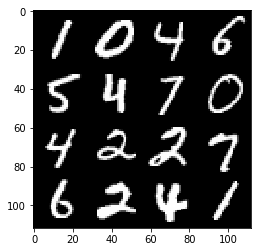

Reconstructed Images


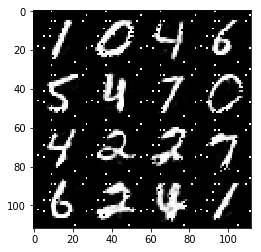

In [46]:
## 1 layer

# Training Parameters
learning_rate = 0.01
num_steps = 30000
batch_size = 256

display_step = 1000
examples_to_show = 10

# Network Parameters
num_hidden_1 = 256 # 1st layer num features
num_hidden_2 = 128 # 2nd layer num features (the latent dim)
num_hidden_3 = 128
num_input = 784 # MNIST data input (img shape: 28*28)

# tf Graph input (only pictures)
X = tf.placeholder("float", [None, num_input])

weights = {
    'encoder_h1': tf.Variable(tf.random_normal([num_input, num_hidden_1])),
#    'encoder_h2': tf.Variable(tf.random_normal([num_hidden_1, num_hidden_2])),
#    'encoder_h3': tf.Variable(tf.random_normal([num_hidden_2, num_hidden_3])),
    'decoder_h1': tf.Variable(tf.random_normal([num_hidden_1, num_input])),
#    'decoder_h2': tf.Variable(tf.random_normal([num_hidden_2, num_hidden_1])),
#    'decoder_h3': tf.Variable(tf.random_normal([num_hidden_1, num_input])),
}
biases = {
    'encoder_b1': tf.Variable(tf.random_normal([num_hidden_1])),
#    'encoder_b2': tf.Variable(tf.random_normal([num_hidden_2])),
#    'encoder_b3': tf.Variable(tf.random_normal([num_hidden_3])),
#    'decoder_b1': tf.Variable(tf.random_normal([num_hidden_2])),
#    'decoder_b2': tf.Variable(tf.random_normal([num_hidden_1])),
    'decoder_b1': tf.Variable(tf.random_normal([num_input])),
}

# Building the encoder
def encoder(x):
    # Encoder Hidden layer with sigmoid activation #1
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['encoder_h1']),
                                   biases['encoder_b1']))
    # Encoder Hidden layer with sigmoid activation #2
#    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['encoder_h2']),
#                                   biases['encoder_b2']))
#    
#    layer_3 = tf.nn.sigmoid(tf.add(tf.matmul(layer_2, weights['encoder_h3']),
#                            biases['encoder_b3']))
    
    return layer_1


# Building the decoder
def decoder(x):
    # Decoder Hidden layer with sigmoid activation #1
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['decoder_h1']),
                                   biases['decoder_b1']))
    # Decoder Hidden layer with sigmoid activation #2
#    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['decoder_h2']),
#                                   biases['decoder_b2']))
    
#    layer_3 = tf.nn.sigmoid(tf.add(tf.matmul(layer_2, weights['decoder_h3']),
#                                   biases['decoder_b3']))
    
    return layer_1

# Construct model
encoder_op = encoder(X)
decoder_op = decoder(encoder_op)

# Prediction
y_pred = decoder_op
# Targets (Labels) are the input data.
y_true = X

# Define loss and optimizer, minimize the squared error
loss = tf.reduce_mean(tf.pow(y_true - y_pred, 2))
optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(loss)

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

# Start Training
# Start a new TF session
with tf.Session() as sess:

    # Run the initializer
    sess.run(init)

    # Training
    for i in range(1, num_steps+1):
        # Prepare Data
        # Get the next batch of MNIST data (only images are needed, not labels)
        batch_x, _ = mnist.train.next_batch(batch_size)

        # Run optimization op (backprop) and cost op (to get loss value)
        _, l = sess.run([optimizer, loss], feed_dict={X: batch_x})
        # Display logs per step
        if i % display_step == 0 or i == 1:
            print('Step %i: Minibatch Loss: %f' % (i, l))

    # Testing
    # Encode and decode images from test set and visualize their reconstruction.
    n = 4
    canvas_orig = np.empty((28 * n, 28 * n))
    canvas_recon = np.empty((28 * n, 28 * n))
    for i in range(n):
        # MNIST test set
        batch_x, _ = mnist.test.next_batch(n)
        # Encode and decode the digit image
        g = sess.run(decoder_op, feed_dict={X: batch_x})

        # Display original images
        for j in range(n):
            # Draw the original digits
            canvas_orig[i * 28:(i + 1) * 28, j * 28:(j + 1) * 28] = \
                batch_x[j].reshape([28, 28])
        # Display reconstructed images
        for j in range(n):
            # Draw the reconstructed digits
            canvas_recon[i * 28:(i + 1) * 28, j * 28:(j + 1) * 28] = \
                g[j].reshape([28, 28])

    print("Original Images")
    plt.figure(figsize=(n, n))
    plt.imshow(canvas_orig, origin="upper", cmap="gray")
    plt.show()

    print("Reconstructed Images")
    plt.figure(figsize=(n, n))
    plt.imshow(canvas_recon, origin="upper", cmap="gray")
    plt.show()

Step 1: Minibatch Loss: 0.459263
Step 1000: Minibatch Loss: 0.184586
Step 2000: Minibatch Loss: 0.165758
Step 3000: Minibatch Loss: 0.152519
Step 4000: Minibatch Loss: 0.147149
Step 5000: Minibatch Loss: 0.136077
Step 6000: Minibatch Loss: 0.132212
Step 7000: Minibatch Loss: 0.129097
Step 8000: Minibatch Loss: 0.127588
Step 9000: Minibatch Loss: 0.122332
Step 10000: Minibatch Loss: 0.120702
Step 11000: Minibatch Loss: 0.119322
Step 12000: Minibatch Loss: 0.117464
Step 13000: Minibatch Loss: 0.115399
Step 14000: Minibatch Loss: 0.113046
Step 15000: Minibatch Loss: 0.112921
Step 16000: Minibatch Loss: 0.112920
Step 17000: Minibatch Loss: 0.112881
Step 18000: Minibatch Loss: 0.109798
Step 19000: Minibatch Loss: 0.108396
Step 20000: Minibatch Loss: 0.110454
Step 21000: Minibatch Loss: 0.109331
Step 22000: Minibatch Loss: 0.109478
Step 23000: Minibatch Loss: 0.108178
Step 24000: Minibatch Loss: 0.106661
Step 25000: Minibatch Loss: 0.105400
Step 26000: Minibatch Loss: 0.105557
Step 27000: Mi

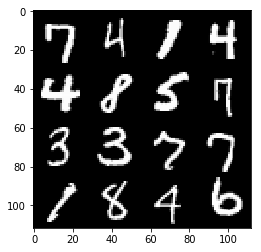

Reconstructed Images


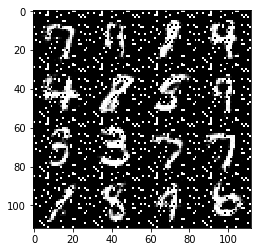

In [47]:
# Network Parameters
num_hidden_1 = 512 # 1st layer num features
num_hidden_2 = 256 # 2nd layer num features (the latent dim)
num_input = 784 # MNIST data input (img shape: 28*28)

# tf Graph input (only pictures)
X = tf.placeholder("float", [None, num_input])

weights = {
    'encoder_h1': tf.Variable(tf.random_normal([num_input, num_hidden_1])),
    'encoder_h2': tf.Variable(tf.random_normal([num_hidden_1, num_hidden_2])),
    'decoder_h1': tf.Variable(tf.random_normal([num_hidden_2, num_hidden_1])),
    'decoder_h2': tf.Variable(tf.random_normal([num_hidden_1, num_input])),
}
biases = {
    'encoder_b1': tf.Variable(tf.random_normal([num_hidden_1])),
    'encoder_b2': tf.Variable(tf.random_normal([num_hidden_2])),
    'decoder_b1': tf.Variable(tf.random_normal([num_hidden_1])),
    'decoder_b2': tf.Variable(tf.random_normal([num_input])),
}

# Building the encoder
def encoder(x):
    # Encoder Hidden layer with sigmoid activation #1
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['encoder_h1']),
                                   biases['encoder_b1']))
    # Encoder Hidden layer with sigmoid activation #2
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['encoder_h2']),
                                   biases['encoder_b2']))
    return layer_2


# Building the decoder
def decoder(x):
    # Decoder Hidden layer with sigmoid activation #1
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['decoder_h1']),
                                   biases['decoder_b1']))
    # Decoder Hidden layer with sigmoid activation #2
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['decoder_h2']),
                                   biases['decoder_b2']))
    return layer_2

# Construct model
encoder_op = encoder(X)
decoder_op = decoder(encoder_op)

# Prediction
y_pred = decoder_op
# Targets (Labels) are the input data.
y_true = X

# Define loss and optimizer, minimize the squared error
loss = tf.reduce_mean(tf.pow(y_true - y_pred, 2))
optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(loss)

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

# Start Training
# Start a new TF session
with tf.Session() as sess:

    # Run the initializer
    sess.run(init)

    # Training
    for i in range(1, num_steps+1):
        # Prepare Data
        # Get the next batch of MNIST data (only images are needed, not labels)
        batch_x, _ = mnist.train.next_batch(batch_size)

        # Run optimization op (backprop) and cost op (to get loss value)
        _, l = sess.run([optimizer, loss], feed_dict={X: batch_x})
        # Display logs per step
        if i % display_step == 0 or i == 1:
            print('Step %i: Minibatch Loss: %f' % (i, l))

    # Testing
    # Encode and decode images from test set and visualize their reconstruction.
    n = 4
    canvas_orig = np.empty((28 * n, 28 * n))
    canvas_recon = np.empty((28 * n, 28 * n))
    for i in range(n):
        # MNIST test set
        batch_x, _ = mnist.test.next_batch(n)
        # Encode and decode the digit image
        g = sess.run(decoder_op, feed_dict={X: batch_x})

        # Display original images
        for j in range(n):
            # Draw the original digits
            canvas_orig[i * 28:(i + 1) * 28, j * 28:(j + 1) * 28] = \
                batch_x[j].reshape([28, 28])
        # Display reconstructed images
        for j in range(n):
            # Draw the reconstructed digits
            canvas_recon[i * 28:(i + 1) * 28, j * 28:(j + 1) * 28] = \
                g[j].reshape([28, 28])

    print("Original Images")
    plt.figure(figsize=(n, n))
    plt.imshow(canvas_orig, origin="upper", cmap="gray")
    plt.show()

    print("Reconstructed Images")
    plt.figure(figsize=(n, n))
    plt.imshow(canvas_recon, origin="upper", cmap="gray")
    plt.show()

Step 1: Minibatch Loss: 0.429548
Step 1000: Minibatch Loss: 0.106672
Step 2000: Minibatch Loss: 0.087508
Step 3000: Minibatch Loss: 0.075716
Step 4000: Minibatch Loss: 0.071136
Step 5000: Minibatch Loss: 0.065866
Step 6000: Minibatch Loss: 0.058534
Step 7000: Minibatch Loss: 0.051456
Step 8000: Minibatch Loss: 0.052240
Step 9000: Minibatch Loss: 0.050507
Step 10000: Minibatch Loss: 0.047095
Step 11000: Minibatch Loss: 0.047255
Step 12000: Minibatch Loss: 0.043540
Step 13000: Minibatch Loss: 0.041170
Step 14000: Minibatch Loss: 0.044471
Step 15000: Minibatch Loss: 0.040459
Step 16000: Minibatch Loss: 0.039216
Step 17000: Minibatch Loss: 0.037148
Step 18000: Minibatch Loss: 0.038223
Step 19000: Minibatch Loss: 0.036484
Step 20000: Minibatch Loss: 0.033776
Step 21000: Minibatch Loss: 0.033020
Step 22000: Minibatch Loss: 0.033972
Step 23000: Minibatch Loss: 0.032227
Step 24000: Minibatch Loss: 0.031148
Step 25000: Minibatch Loss: 0.030257
Step 26000: Minibatch Loss: 0.029476
Step 27000: Mi

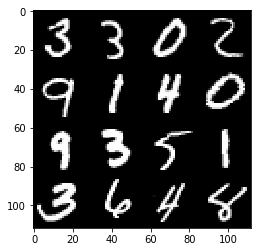

Reconstructed Images


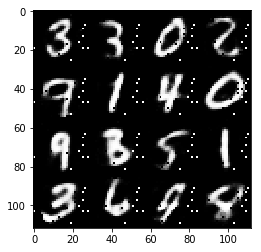

In [55]:
# Network Parameters
num_hidden_1 = 128 # 1st layer num features
num_hidden_2 = 64 # 2nd layer num features (the latent dim)
num_input = 784 # MNIST data input (img shape: 28*28)

# tf Graph input (only pictures)
X = tf.placeholder("float", [None, num_input])

weights = {
    'encoder_h1': tf.Variable(tf.random_normal([num_input, num_hidden_1])),
    'encoder_h2': tf.Variable(tf.random_normal([num_hidden_1, num_hidden_2])),
    'decoder_h1': tf.Variable(tf.random_normal([num_hidden_2, num_hidden_1])),
    'decoder_h2': tf.Variable(tf.random_normal([num_hidden_1, num_input])),
}
biases = {
    'encoder_b1': tf.Variable(tf.random_normal([num_hidden_1])),
    'encoder_b2': tf.Variable(tf.random_normal([num_hidden_2])),
    'decoder_b1': tf.Variable(tf.random_normal([num_hidden_1])),
    'decoder_b2': tf.Variable(tf.random_normal([num_input])),
}

# Building the encoder
def encoder(x):
    # Encoder Hidden layer with sigmoid activation #1
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['encoder_h1']),
                                   biases['encoder_b1']))
    # Encoder Hidden layer with sigmoid activation #2
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['encoder_h2']),
                                   biases['encoder_b2']))
    return layer_2


# Building the decoder
def decoder(x):
    # Decoder Hidden layer with sigmoid activation #1
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['decoder_h1']),
                                   biases['decoder_b1']))
    # Decoder Hidden layer with sigmoid activation #2
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['decoder_h2']),
                                   biases['decoder_b2']))
    return layer_2

# Construct model
encoder_op = encoder(X)
decoder_op = decoder(encoder_op)

# Prediction
y_pred = decoder_op
# Targets (Labels) are the input data.
y_true = X

# Define loss and optimizer, minimize the squared error
loss = tf.reduce_mean(tf.pow(y_true - y_pred, 2))
optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(loss)

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

# Start Training
# Start a new TF session
with tf.Session() as sess:

    # Run the initializer
    sess.run(init)

    # Training
    for i in range(1, num_steps+1):
        # Prepare Data
        # Get the next batch of MNIST data (only images are needed, not labels)
        batch_x, _ = mnist.train.next_batch(batch_size)

        # Run optimization op (backprop) and cost op (to get loss value)
        _, l = sess.run([optimizer, loss], feed_dict={X: batch_x})
        # Display logs per step
        if i % display_step == 0 or i == 1:
            print('Step %i: Minibatch Loss: %f' % (i, l))

    # Testing
    # Encode and decode images from test set and visualize their reconstruction.
    n = 4
    canvas_orig = np.empty((28 * n, 28 * n))
    canvas_recon = np.empty((28 * n, 28 * n))
    for i in range(n):
        # MNIST test set
        batch_x, _ = mnist.test.next_batch(n)
        # Encode and decode the digit image
        g = sess.run(decoder_op, feed_dict={X: batch_x})

        # Display original images
        for j in range(n):
            # Draw the original digits
            canvas_orig[i * 28:(i + 1) * 28, j * 28:(j + 1) * 28] = \
                batch_x[j].reshape([28, 28])
        # Display reconstructed images
        for j in range(n):
            # Draw the reconstructed digits
            canvas_recon[i * 28:(i + 1) * 28, j * 28:(j + 1) * 28] = \
                g[j].reshape([28, 28])

    print("Original Images")
    plt.figure(figsize=(n, n))
    plt.imshow(canvas_orig, origin="upper", cmap="gray")
    plt.show()

    print("Reconstructed Images")
    plt.figure(figsize=(n, n))
    plt.imshow(canvas_recon, origin="upper", cmap="gray")
    plt.show()
    saver = tf.train.Saver()
    saver.save(sess, './mnist_2layer_128', global_step=1000)

In [56]:
#restore

sess = tf.Session()
saver = tf.train.import_meta_graph('./mnist_2layer_128-1000.meta')